<center>
<img src='https://i.postimg.cc/63rDLhtJ/lang-pic.jpg' width=600>
</center>
    
# 1. Introduction

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">1.1 NLP series</p>

This is the **fifth in a series of notebooks** covering the **fundamentals of Natural Language Processing (NLP)**. I find that the best way to learn is by teaching others, hence why I am sharing my journey learning this field from scratch. I hope these notebooks can be helpful to you too. 

NLP series:

1. [NLP1 - Tokenization](https://www.kaggle.com/samuelcortinhas/nlp1-tokenization)
2. [NLP2 - Pre-processing](https://www.kaggle.com/samuelcortinhas/nlp2-pre-processing) 
3. [NLP3 - Bag-of-Words and Similarity](https://www.kaggle.com/samuelcortinhas/nlp3-bag-of-words-and-similarity)
4. [NLP4 - TF-IDF and Document Search](https://www.kaggle.com/samuelcortinhas/nlp4-tf-idf-and-document-search)
5. [NLP5 - Text Classification with Naive Bayes](https://www.kaggle.com/samuelcortinhas/nlp5-text-classification-with-naive-bayes) (this one)
6. [NLP6 - Topic Modelling with LDA](https://www.kaggle.com/samuelcortinhas/nlp6-topic-modelling-with-lda)
7. [NLP7 - Word Embeddings](https://www.kaggle.com/code/samuelcortinhas/nlp7-word-embeddings)
8. [NLP8 - RNNs and Language Models](https://www.kaggle.com/samuelcortinhas/nlp8-rnns-and-language-models)
9. [NLP9 - Machine Translation and Attention](https://www.kaggle.com/samuelcortinhas/nlp9-machine-translation-and-attention) 
10. [NLP10 - Transformers](https://www.kaggle.com/samuelcortinhas/nlp10-transformers)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">1.2 Outline</p>

With the previous notebooks, we've developed a solid understanding of the fundamentals of NLP with tokenization, pre-processing and vectorization. 

We're now ready to tackle one of the **most common** NLP tasks, namely **text classification**. This is the process of **assigning a class/label to a piece of text** in a corpus. For example, this could be positive/neutral/negative sentiment in a tweet (**sentiment analysis**) or perhaps fraudulent/non-fraudulent insurance claims (**fraud detection**). 

We are going to approach this by using **Naive Bayes**, which is a fast and simple text classification technique that is still widely used today. 

# 2. Bayes' theorem

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.1 Probability</p>

<center>
<img src='https://i.postimg.cc/GtpZV52k/dice.webp' width=400>
</center>
<br>

A **probability** is a number between 0 and 1 (inclusive) that represents **how likely** an event is going to happen. The closer to 1 the more likely you believe that event will occur. For example, the probability of rolling a 6 on a fair die is 1/6 because it is 1 of 6 equally likely events. 

If you roll two fair dice, the probability of getting two 6's in a row is 1/6 * 1/6 = 1/36. We can multiply the probability because these events are **independent**. That is, the number that appears on the first die has **no affect whatsoever** on the number that appears on the second die.

In general, for two **independent events** $A$ and $B$, we have the following

<br>
$$
\large
\mathbb{P}(A \cap B) = \mathbb{P}(A) \mathbb{P}(B) \tag{1}
$$
<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.2 Conditional probability </p>

To see where equation (1) comes from, we need to talk about **conditional probability**. This is the probability of an event in the case of having **prior information** on that event. It is defined as 

<br>
$$
\large
\mathbb{P}(A | B) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(B)} \tag{2}
$$
<br>

For example, if we take a card from a shuffled deck at **random** and we are told it is a **spade** (event B), then how likely is it to be the **ace of spades** (event A)? 

Answer: We know that $\mathbb{P}(A) = 1/52$ and $\mathbb{P}(B) = 1/4$, therefore $\mathbb{P}(A | B) = 1/52 \div 1/4 = 1/13$. 

Re-arranging equation (2) we get 

<br>
$$
\large
\mathbb{P}(A \cap B) = \mathbb{P}(A | B) \mathbb{P}(B) \tag{3}
$$
<br>
<br>

And when $A$ and $B$ are independent, we have $\mathbb{P}(A | B) = \mathbb{P}(A)$ (because $B$ has no affect on $A$) so we get back the independence equation we saw earlier, i.e. (1). 

Note that when two events are not independent, we call them **dependent events**. Be aware that sometimes equation (3) is called the **multiplication rule**. 

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.3 Deriving Bayes' theorem </p>

Deriving Bayes' theorem is surprisingly easy. We start with equation (3), $\mathbb{P}(A \cap B) = \mathbb{P}(A | B) \mathbb{P}(B)$. If we swap event $A$ with event $B$ and vice versa, we get $\mathbb{P}(B \cap A) = \mathbb{P}(B | A) \mathbb{P}(A)$. And since probability is **commutative**, i.e. $\mathbb{P}(A \cap B) = \mathbb{P}(B \cap A)$, we can set the two equations equal to each other. That is,

<br>
$$
\large
\mathbb{P}(A | B) \mathbb{P}(B) = \mathbb{P}(B | A) \mathbb{P}(A) \tag{4}
$$
<br>

Dividing by $\mathbb{P}(B)$ (assuming it is non-zero), we arrive at **Bayes' theorem**

<br>
$$
\large
\mathbb{P}(A | B) = \frac{\mathbb{P}(B | A) \mathbb{P}(A)}{\mathbb{P}(B)} \tag{5}
$$
<br>

This equation is the **fundamental theorem** of **Bayesian statistics** and in fact each term in this equation gets its own name because it is so important. 

* $\mathbb{P}(B | A)$ is called the **likelihood**,
* $\mathbb{P}(A)$ is called the **prior**,
* $\mathbb{P}(B)$ is called the **evidence**,
* $\mathbb{P}(A | B)$ is called the **posterior**. 

It is immensively useful because simply put, it allows us to **update our beliefs when new data becomes available**. 

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.4 Example </p>

<center>
<img src='https://i.postimg.cc/9QZBH1yq/covid.jpg' width=600>
</center>
<br>
    
Let's say you took a **covid test** and it came back **positive**. You want to know what is the probability that you actually have covid. 

To work this out, we'll let $A$ be the event you that have **covid**, and $B$ be the event that a covid test is **positive**. We are trying to find $\mathbb{P}(A | B)$, i.e. given you have a positive test, how likely is it that you have covid as well. 

From experiments done by scientists, we are told that the probability of a **random** covid test being positive is 15%, i.e. $\mathbb{P}(B)=0.15$.

Furthermore, the **recall** or **sensitivity** of the tests is around 80%. That means, if you actually have covid then the probability of returning a positive test is 80%, so $\mathbb{P}(B | A) = 0.8$. 

Finally, the probability of a **random** person having covid at the moment is estimated to be 1/50 or 2%. This means $\mathbb{P}(B)=0.02$. 

Using Bayes' theorem, we calculate that $\mathbb{P}(A | B) = 0.8 \times 0.02 \div 0.15 = 0.107$. We have shown that if you get a positive covid test, the probability of actually having covid is only **about 10%**. This statistic is called the **precision** of the test - out of all the positives, how many of them were true positives. 

This surprising results comes from the fact that the distributions of covid cases and covid tests are **highly imbalanced**. Even though the tests have a **high sensitivity**, because most people don't actually have covid the tests will pick up a lot of false positives, i.e. the test has a **low precision**. This isn't a huge problem though as false negatives are more important to avoid than false positives due to the contagious nature of the virus. 

# 3. Text classification

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.1 Conditioning on a word</p>

<center>
<img src='https://i.postimg.cc/tJxmKZPz/sentiment.jpg' width=500>
</center>
<br>

Suppose we want to **classify** a piece of text as being either **positive or negative sentiment**. If the word **"amazing"** appears, what is the probability that that document is **positive**? Let's use Bayes' theorem. 

<br>
$$
\large
\mathbb{P}(\text{positive} | \text{"amazing"}) = \frac{\mathbb{P}(\text{"amazing"} | \text{positive}) \mathbb{P}(\text{positive})}{\mathbb{P}(\text{"amazing"})} \tag{6}
$$
<br>

We can work out the **3 terms** on right side of the equation as follows:

* $\mathbb{P}(\text{positive})$ - count how many documents are positive and divide by the total number of documents,
* $\mathbb{P}(\text{"amazing"})$ - count how many times the word "amazing" appears in the corpus and divide by the total number of words,
* $\mathbb{P}(\text{"amazing"} | \text{positive})$ - out of all the positive documents, count how many times the word "amazing" appears and divide by the number of words in the positive documents.

So we converted the question from inferring the sentiment into a matter of working out the **proportions** a word appears in different documents. And this is something computers can do **very quickly**. But what do we do if we want to condition on a whole document and not just a single word? Let's see below.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.2 Conditioning on a document</p>

This time we want to find the most likely class when we **condition on an entire document** of text. We can write this task as the following optimization problem 

<br>
$$
\large
\text{argmax}_{c \in C} \mathbb{P}(c|d) = \text{argmax}_{c \in C} \frac{\mathbb{P}(d|c)\mathbb{P}(c)}{\mathbb{P}(d)} \tag{7}
$$
<br>

where $c$ and $d$ denote a class and document respectively. Since we are maximizing over all the classes, we can **remove the normalizing constant** that only depends on the document. This is really useful because it means we don't have to create a model for how likely each document appears in a corpus. This reduces our problem to

<br>
$$
\large
\hat{c} = \text{argmax}_{c \in C} \mathbb{P}(c|d) = \text{argmax}_{c \in C} \mathbb{P}(d|c)\mathbb{P}(c) \tag{8}
$$
<br>

Working out the **probability of each class** $\mathbb{P}(c)$ is simple - we just count many documents of that class there are and divide by the total number of documents. The question now is, how do we work out the **likelihood** $\mathbb{P}(d|c)$. Remember that the document is just a sequence of tokens, so we can also write this term as $\mathbb{P}([w_1,w_2,...,w_n]|c)$.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.3 Naive Bayes</p>

To work out $\mathbb{P}([w_1,w_2,...,w_n]|c)$, we make **two assumptions** on the data. First, just like in a bag-of-word representation, we assume **word order doesn't matter**. Second, we assume that each token appears **independently** of all other tokens. 

This second assumption is where the term **"naive"** in Naive Bayes comes from. It is called naive because the assumption obviously **isn't true** in all languages. For example, if someone says the word "Merry" then proceeding word is much more likely to be "Christmas" than "cabbage". That is, "Merry" and "Christmas" are **not independent** words - they are in fact **correlated**. That being said, the naive assumption models the data sufficiently well.

Under these assumptions, we can express the likelihood as a **product** of conditional probabilities. In particular, $\mathbb{P}([w_1,w_2,...,w_n]|c) = \mathbb{P}(w_1|c) \mathbb{P}(w_2|c) ... \mathbb{P}(w_{n-1}|c) \mathbb{P}(w_n|c)$. And these are quantities we **can calculate** in the same way as we were doing before - for $i=1,...,n$ count the number of times word $w_i$ appears in documents with class $c$ and divide by the total number of words in the corresponding documents. We can therefore update our model to be

<br>
$$
\large
\hat{c} = \text{argmax}_{c \in C} \mathbb{P}(c) \mathbb{P}(w_1|c) \mathbb{P}(w_2|c) ... \mathbb{P}(w_{n-1}|c) \mathbb{P}(w_n|c) \tag{9}
$$
<br>

For very large corpuses, these probabilities will likely be **very small**. And multiplying lots of small number together can produce numbers too small for our computes to keep track of. To overcome this, it is standard to simply **apply the logarithm** to the above expression. This doesn't change the model, but it does **improve numerical stability**. Using properties of the logarithm, the **final Naive Bayes model** can be written as

<br>
$$
\large
\hat{c} = \text{argmax}_{c \in C} \log \mathbb{P}(c) + \sum_{i=1}^{n} \log \mathbb{P}(w_i|c) \tag{10}
$$
<br>

Naive Bayes is a **very fast** algorithm because it only requires **one forward pass** of the dataset. We will later see deep learning approaches that perform multiple passes - these will be more accurate but slower.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.4 Practical details</p>

In practice, there are a few **computational tricks** that are used to **improve the performance** of a Naive Bayes classifier. First, many words just don't appear in a classes set of documents so we could end up with resulting probabilities equal to 0. This is a problem because we need to take the logarithm of these probabilities and the **log of 0 is undefined**. There are many ways to deal with this (see [A Comparison of Smoothing Techniques for Bilingual Lexicon Extraction
from Comparable Corpora](https://aclanthology.org/W13-2504.pdf)). The most popular one is called **additive smoothing** where the probabilities $\frac{\text{count}(w_i) \, \text{in c}}{\text{count}(w) \, \text{in c}}$ are modified using a **smoothing parameter** $\alpha \in (0,1]$ to become

$$
\large
p_i = \frac{\text{count}(w_i) \, \text{in c} + \alpha}{\text{count}(w) \, \text{in c} + \alpha |V|}
$$

where $|V|$ is the size of the vocabulary. When $\alpha=1$, this is called **Laplace smoothing** and when $\alpha<1$, this is called **Lidstone smoothing**. This hyperparameter can be tuned to the specific application. The result is that the probabilities are **always positive** which ensure **stability** in our solution. 

<center>
<img src='https://i.postimg.cc/cJdFpTNL/softmax.png' width=250>
</center>
<br>

Another useful trick to be aware about is that to return the **probabilities** associated with our predictions, i.e. how confident we are with assigning a particular class, we can apply the **softmax** function to the output of our computations across all the classes. This makes sense since the model outputs are log transformed and the softmax function applies the exponential function to all outputs and then normalizes. However, keep in mind that this is only a **rough estimate** of the probabilities because the smoothing will have introduce some error into the calculations to ensure stability. 

# 4. Application

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.1 Newsgroup classification</p>

**Import libraries**

In [1]:
# Core
import spacy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

We are going to use the **20 news groups** sklearn dataset again and the tast this time is given a news article, we need to classify which news group it belongs to. 

In [2]:
# Fetch data
train_corpus = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_corpus = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# Print dataset sizes
print('Train size:', len(train_corpus.data))
print('Test size:', len(test_corpus.data))

Train size: 11314
Test size: 7532


And let's **preview the data** to get a better idea of what we're dealing with.

In [3]:
# Labels
print('Labels:', train_corpus.target_names)

# Label encoding
print('\nLabel encoding:', train_corpus.target)

# Example article
print('\nExample article:', train_corpus.data[0])

Labels: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Label encoding: [7 4 4 ... 3 1 8]

Example article: I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


Now let's plot the **target distribution**. It appears to be **reasonably balanced**, which is good.

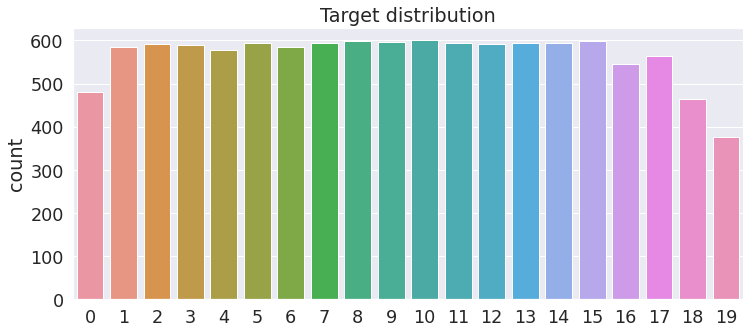

In [4]:
plt.figure(figsize=(12,5))
sns.countplot(train_corpus.target)
plt.title('Target distribution')
plt.show()

We'll start with a **baseline tokenizer** that simply removes punctuation, spaces and numbers but we'll improve on this later and compare the results. To speed up this process, we'll use a **blank pipeline** as this doesn't try to parse, lemmatize etc the text.

In [5]:
# Load english language model
nlp = spacy.blank('en')

# Define a custom tokenizer using spacy
def custom_tokenizer(doc):
    return [t.text for t in nlp(doc) if not t.is_punct and not t.is_space and t.is_alpha]

To model the data, we need to **convert our text to numbers**. The most natural way is to use a **Bag-of-Words representation**, which corresponds to the derivations we've done above. But later, we'll also compare this to the **TF-IDF representation**, which is known to work well with Naive Bayes.

In [6]:
%%time

# Define vectorizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

# Fit and transform train data
X = vectorizer.fit_transform(train_corpus.data)
y = train_corpus.target

# Transform test data
X_test = vectorizer.transform(test_corpus.data)
y_test = test_corpus.target

CPU times: user 24.4 s, sys: 85.2 ms, total: 24.5 s
Wall time: 24.5 s


We're now ready to **train** a Naive Bayes model. In sklearn, it is called `MultinomialNB` because the data has a **multinomial distribution** (since we assume words appear **independently**). Notice how **fast** the model gets trained compared to the vectorization.

In [7]:
%%time

# Define model
clf = MultinomialNB()

# Train model
clf.fit(X, y)

CPU times: user 49.6 ms, sys: 12.1 ms, total: 61.6 ms
Wall time: 64 ms


MultinomialNB()

Then we **evaluate the model** on the test set. We'll use this score as a **baseline** to compare it to improved models.

In [8]:
# Predict on test set
test_preds = clf.predict(X_test)

# Measure f1-score
print('Test set F1-score:', f1_score(y_test, test_preds, average='macro'))

Test set F1-score: 0.5751953553873447


Let's take a look at the **confusion matrix** to see where the model made **misclassifications**.

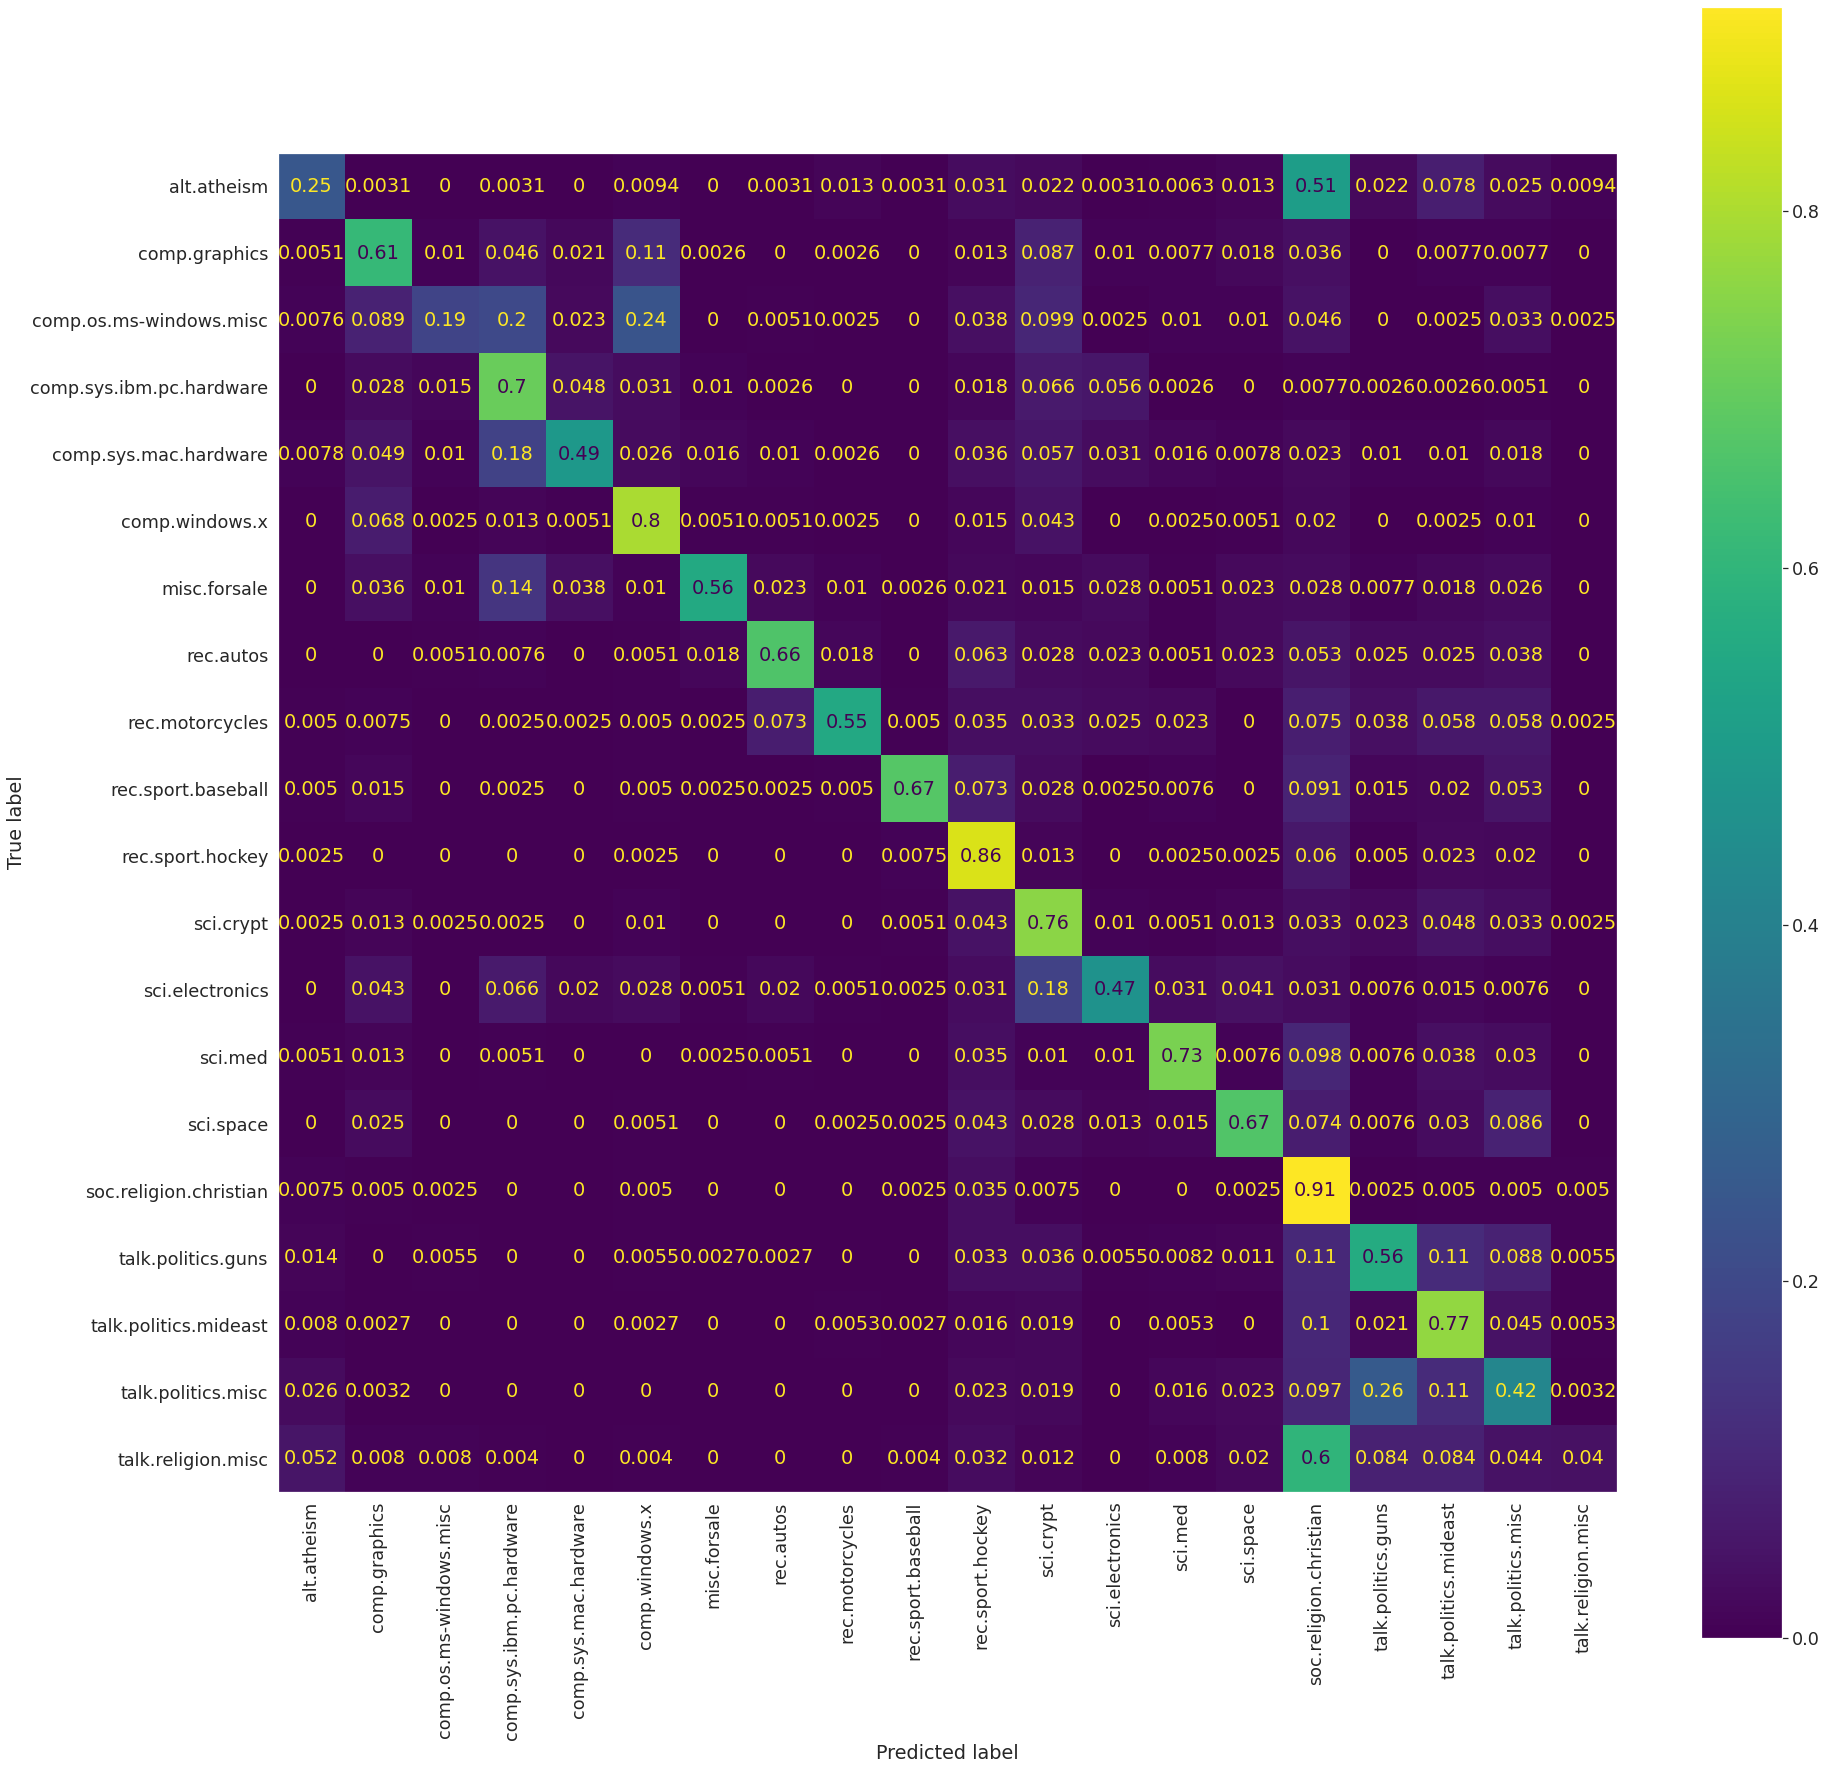

In [9]:
# Figure size
fig, ax = plt.subplots(figsize=(30, 30))
ax.grid(False)

# Create the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, normalize='true', display_labels=train_corpus.target_names, xticks_rotation='vertical', ax=ax)

*Observations:*
* The more **specific** a topic is, the better the model is at classifying it.
* Topics with lots of vocabulary **overlap**, like christianity and atheism produced the most errors.

Another useway way to see how well the model did is via the sklearn **classification report**, which shows a breakdown of **precision** and **recall** scores on a **class-by-class basis**.

In [10]:
print(classification_report(y_test, test_preds, target_names=train_corpus.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.62      0.25      0.35       319
           comp.graphics       0.60      0.61      0.61       389
 comp.os.ms-windows.misc       0.73      0.19      0.30       394
comp.sys.ibm.pc.hardware       0.51      0.70      0.59       392
   comp.sys.mac.hardware       0.75      0.49      0.59       385
          comp.windows.x       0.62      0.80      0.70       395
            misc.forsale       0.89      0.56      0.69       390
               rec.autos       0.81      0.66      0.73       396
         rec.motorcycles       0.89      0.55      0.68       398
      rec.sport.baseball       0.95      0.67      0.79       397
        rec.sport.hockey       0.59      0.86      0.70       399
               sci.crypt       0.49      0.76      0.60       396
         sci.electronics       0.68      0.47      0.55       393
                 sci.med       0.81      0.73      0.77       396
         

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.2 Improvements to baseline</p>

Let's try to **improve** upon the above baseline using the things we've learnt so far. For starters, we'll use add **lemmatization** and **stop-word removal** to our tokenizer. This will reduce the number of synonyms and low information words.

In [11]:
# Load full english language model
nlp = spacy.load('en_core_web_sm')

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ['ner', 'parser']

# Custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if not t.is_punct and not t.is_space and not t.is_stop and t.is_alpha]

We'll use the **TF-IDF representation** as our vectorizer this time. This takes quite a bit **longer** than before because of the more complex tokenizer and vectorizer.

In [12]:
%%time

# Define vectorizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

# Fit and transform train data
X = vectorizer.fit_transform(train_corpus.data)
y = train_corpus.target

# Transform test data
X_test = vectorizer.transform(test_corpus.data)
y_test = test_corpus.target

CPU times: user 4min 25s, sys: 3.21 s, total: 4min 28s
Wall time: 4min 28s


Remember how **additive smoothing** is being applied in a **Naive Bayes** model for numerical stability. This is set using the parameter `alpha` and is default value is 1. We're now going to **tune** this **hyperparameter** using **grid search**. Even grid search and cross validation, the model is **trained very quickly**.

In [13]:
%%time

# Parameters to tune
grid = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

# Define model
clf = MultinomialNB()

# Define grid search
model = GridSearchCV(clf, param_grid=grid, scoring='f1_macro', n_jobs=-1, cv=5, verbose=5)

# Train model using grid search
model.fit(X, y)

# Print best value of alpha
print('Best parameters:', model.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters: {'alpha': 0.01}
CPU times: user 199 ms, sys: 91.7 ms, total: 291 ms
Wall time: 1.6 s


And **evaluate** the model.

In [14]:
# Predict on test set
test_preds = model.predict(X_test)

# Measure f1-score
print('Test set F1-score:', f1_score(y_test, test_preds, average='macro'))

Test set F1-score: 0.6756899105209825


Great - that is a **10% improvement**!

Plot the **confusion matrix**.

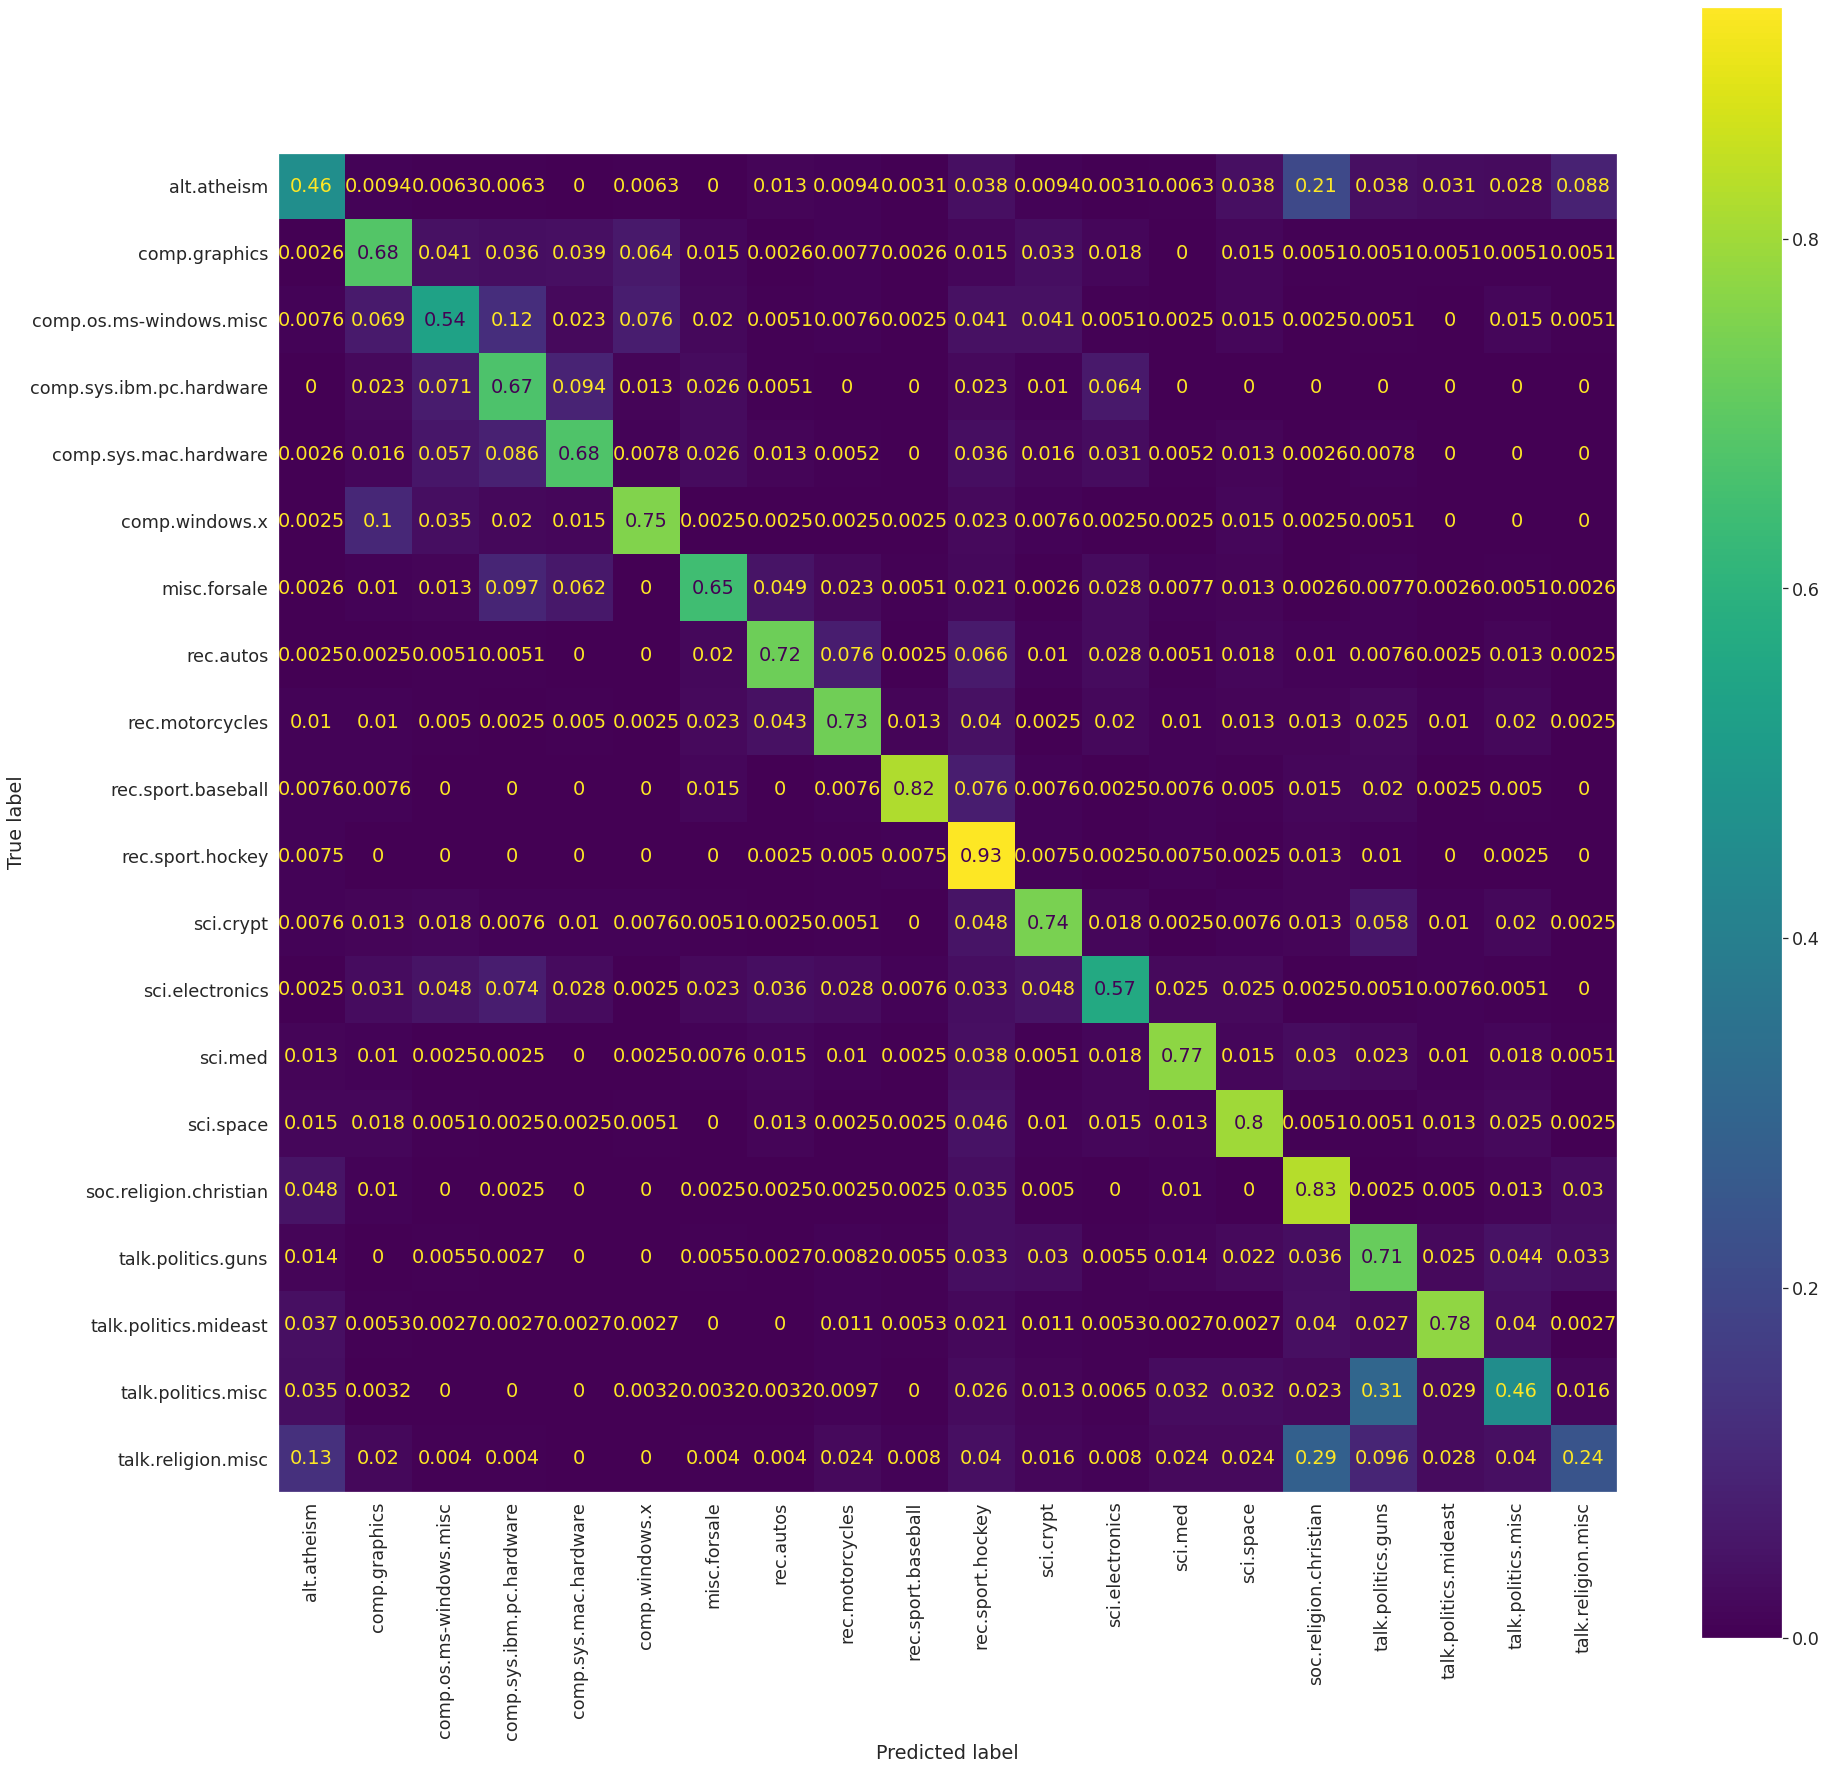

In [15]:
# Figure size
fig, ax = plt.subplots(figsize=(30, 30))
ax.grid(False)

# Create the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', display_labels=train_corpus.target_names, xticks_rotation='vertical', ax=ax)

Finally, print the **classification report**. 

In [16]:
print(classification_report(y_test, test_preds, target_names=train_corpus.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.56      0.46      0.51       319
           comp.graphics       0.66      0.68      0.67       389
 comp.os.ms-windows.misc       0.63      0.54      0.58       394
comp.sys.ibm.pc.hardware       0.59      0.67      0.63       392
   comp.sys.mac.hardware       0.70      0.68      0.69       385
          comp.windows.x       0.80      0.75      0.78       395
            misc.forsale       0.77      0.65      0.70       390
               rec.autos       0.78      0.72      0.75       396
         rec.motorcycles       0.76      0.73      0.75       398
      rec.sport.baseball       0.92      0.82      0.87       397
        rec.sport.hockey       0.59      0.93      0.72       399
               sci.crypt       0.73      0.74      0.74       396
         sci.electronics       0.67      0.57      0.62       393
                 sci.med       0.83      0.77      0.80       396
         

**Breakdown of improvements:** (found via additional experiements)
* Adding **lemmatization and stop-word removal** to the tokenizer improved F1-score from **57.5% to 63.2%**.
* Using **TF-IDF** instead of Bag-of-Word improved F1-score from **63.2% to 63.8%**.
* Tuning the **additive smoothing** hyperparameter improved F1-score from **63.8% to 67.6%**.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.3 Classifying new articles</p>

The last thing we'll do is take a **new article of text** and **classify it** using our pipeline, which consists of tokenization, vectorization and naive bayes modelling. 

We'll also return the **confidence** in our prediction, i.e. the **estimated probability** that the model believes the text belongs to that class.

In [17]:
# Space related article
article = ["Nasa's Swot satellite will survey millions of rivers and lakes"]

# Vectorize text
X_article = vectorizer.transform(article)

# Predict probability of each class
proba_article = model.predict_proba(X_article)

# Calculate predicted class and confidence
id_max = np.argmax(proba_article)
pred_article = train_corpus.target_names[id_max]
conf = np.max(proba_article)

# Print predictions
print('Prediction:', pred_article)
print('Confidence:', conf)

Prediction: sci.space
Confidence: 0.9375006720672664


# 5. Conclusion

We covered a lot in this notebook on **text classification**. We **derived** both **Bayes' theorem** and **Naive Bayes** using the fundamentals of **probability theory**. We looked at examples and talked about practical details like **additive smoothing**.

Furthermore, several **numerical experiments** were performed. We built a pipeline that **tokenized** and **vectorized** text into numbers, which was then fed into a **Multinomial Naive Bayes model** used to classify the text.

Even though we optimized our baseline model, there are many more **improvements** that can be made to our solution. For example, we could **augment** the training data to create more of it. We could also incorporate **n-grams**, remove additional **stop words** or even try other **classification models**. 

**References:**
* [NLP demystified](https://www.nlpdemystified.org/)

Thanks for reading!